# 6. Decision Trees and Ensemble Learning

This week, we'll talk about decision trees and tree-based ensemble algorithms

## 6.1 Credit risk scoring project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

The data is taken from [GitHub](https://github.com/gastonstat/CreditScoring)

# 6.2 Data cleaning and preparation
* Downlading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget -q $data -O CreditScoring.csv

In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv("CreditScoring.csv")

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [10]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [11]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [12]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [13]:

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [14]:

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [15]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [16]:
#replace missing numbers with n/a
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value=np.nan)

In [17]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [18]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [19]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [20]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=11)


In [21]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [22]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [23]:
del df_train['status']
del df_val['status']
del df_test['status']

In [24]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,15,owner,60,34,married,no,fixed,45,82.0,3500.0,0.0,750,1624
1,7,parents,60,30,single,no,fixed,35,95.0,0.0,0.0,900,1158
2,10,owner,36,47,married,no,fixed,60,133.0,3000.0,0.0,360,360
3,5,owner,48,39,married,yes,freelance,45,100.0,30000.0,0.0,1550,2294
4,14,owner,36,40,married,no,fixed,45,80.0,3000.0,0.0,900,1263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2846,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2847,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2848,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 6.3 Decision trees
* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
train_dict = df_train.to_dict(orient='records') #might need to fillna(0) to avoid getting errors

In [27]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [28]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
y_pred = dt.predict_proba(X_val)[:,1]

In [32]:
roc_auc_score(y_val, y_pred)

np.float64(0.6498262910798123)

In [33]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

#### Overfitting - memorizing the data, but fails to generalize

_Solution_: Need to restrict the __depth__ of the tree

In [34]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
#train
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

np.float64(0.7700033886231307)

In [36]:
#validation
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7477511737089203)

In [37]:
#Tree with one condition is called a 'decision stump'

In [38]:
from sklearn.tree import export_text

In [39]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



## 6.4 Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

In [40]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],    
]

In [41]:
df_example = pd.DataFrame(data, columns=['assets', 'status'])

In [42]:
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [43]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [44]:
#split when assets Left T=2000, 3000, 4000, Right 5000, 8000 Thresholds

In [45]:
Ts = [0, 2000, 3000, 4000, 5000, 8000] #potential thresholds

In [46]:
#cut dataset into left and right

In [47]:
from IPython.display import display

In [48]:
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets>T]

    print(T)
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



### Miscalssification rate - impurity

Incorrect pred/correct pred

we need to calculate an average from the table

![misclassificatoin impurity](images/misclassification_rate.jpg "a title")

Best T = 3000, IMPURITY: 10%

### We have done it with one feature. What if we have another feature:

In [49]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],    
]
df_example = pd.DataFrame(data, columns=['assets', 'debt','status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [50]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [51]:
T=[500, 1000, 2000]# splits

In [52]:
thresholds = {
    'assets':[0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

for feature, Ts in thresholds.items():
    print(20*"#")
    print(feature)
    
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature]>T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        
        print()
    print(20*"#")

####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

####################
####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

####################


![misclassificatoin impurity](images/misclassification_rate_debt.jpg "a title")

Debt is NOT as useful for making the splts as assets. The best is still 3000 with average 10% of impurity

### Finding the best split (for every feature) finding all possiblethresholds, we iterate over all thresholds for this feature.

Stopping criteria: 
* group already pure,
* reached the depth limit,
* group is too small to split

## Decisiton tree learning algorithm:

* find best split
* stop if __max depth__ is reached
* check if left is __sufficiently large__ and not pure (yet)
* we repeat for left repeat same algorithm


---

* same thing for the right!

---

## 6.5 Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

In [53]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.607
   2 -> 0.676
   3 -> 0.748
   4 -> 0.772
   5 -> 0.771
   6 -> 0.777
  10 -> 0.704
  15 -> 0.657
  20 -> 0.638
None -> 0.642


In [54]:
#Best is 6

In [55]:
for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        print('(%4s, %3d) -> %.3f' % (d, s, auc))
    

(   4,   1) -> 0.772
(   4,   2) -> 0.772
(   4,   5) -> 0.772
(   4,  10) -> 0.772
(   4,  15) -> 0.773
(   4,  20) -> 0.766
(   4, 100) -> 0.767
(   4, 200) -> 0.765
(   4, 500) -> 0.697
(   5,   1) -> 0.774
(   5,   2) -> 0.771
(   5,   5) -> 0.772
(   5,  10) -> 0.771
(   5,  15) -> 0.776
(   5,  20) -> 0.783
(   5, 100) -> 0.780
(   5, 200) -> 0.773
(   5, 500) -> 0.697
(   6,   1) -> 0.779
(   6,   2) -> 0.778
(   6,   5) -> 0.780
(   6,  10) -> 0.779
(   6,  15) -> 0.784
(   6,  20) -> 0.792
(   6, 100) -> 0.784
(   6, 200) -> 0.784
(   6, 500) -> 0.697


In [56]:
#let's put it in a dataframe
scores = []

for d in [4,5,6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,100,200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))

In [57]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.772390
1,4.0,2,0.772390
2,4.0,5,0.772390
3,4.0,10,0.772390
4,4.0,15,0.772723


In [58]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
41,10.0,20,0.800817
68,NaN,20,0.793300
59,20.0,20,0.792338
23,6.0,20,0.792221
50,15.0,20,0.791939
...,...,...,...
55,20.0,2,0.676258
45,15.0,1,0.667906
64,NaN,2,0.665385
63,NaN,1,0.656216


In [59]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns = ['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.656  0.772  0.771  0.779  0.767  0.704  0.668  0.640
2                 0.665  0.772  0.771  0.778  0.761  0.706  0.680  0.676
5                 0.720  0.772  0.772  0.781  0.764  0.751  0.728  0.736
10                0.763  0.772  0.771  0.779  0.769  0.770  0.766  0.765
15                0.781  0.773  0.779  0.788  0.782  0.787  0.780  0.779
20                0.793  0.766  0.783  0.792  0.792  0.801  0.792  0.792
100               0.785  0.767  0.780  0.784  0.783  0.785  0.785  0.785
200               0.784  0.765  0.773  0.784  0.784  0.784  0.784  0.784
500               0.697  0.697  0.697  0.697  0.697  0.697  0.697  0.697

In [60]:
#Visualize as heatmap

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

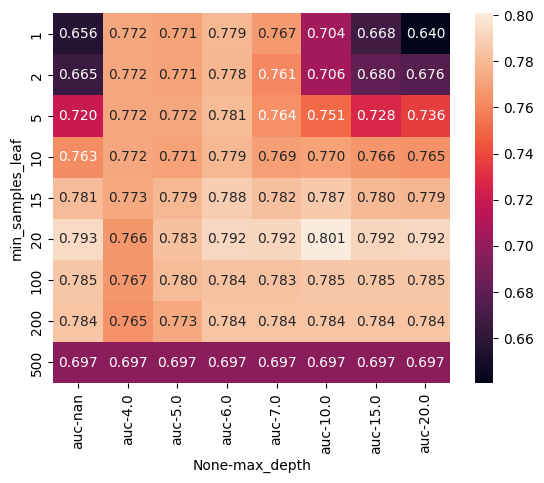

In [61]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [62]:
#we need to try our final decision tree classifier
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and random forest

* Board of experts
* Ensebling models
* Random forest - ensembling decision trees
* Tuning random forest

![random forest](images/random_forest.jpg "a title")

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=10, random_state=1) #if we fix random state = we'll fix the randomnes
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [65]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7898450704225353)

In [66]:
#each tree gets a random subset of features

In [67]:
 
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [68]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [69]:
df_scores = pd.DataFrame(scores, columns=["n_estimators","auc"])

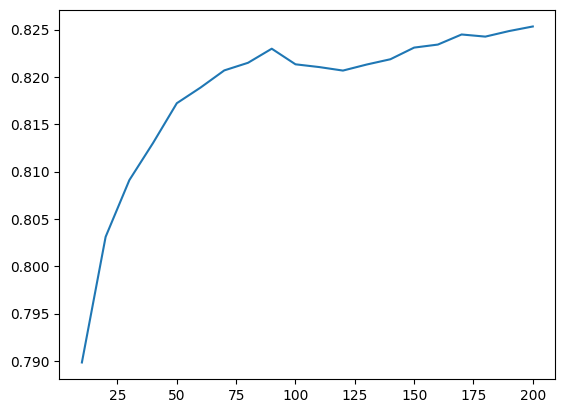

In [70]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [71]:
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [72]:
columns=["max_depth", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.806498
1,5,20,0.808817
2,5,30,0.812812
3,5,40,0.812286
4,5,50,0.812681


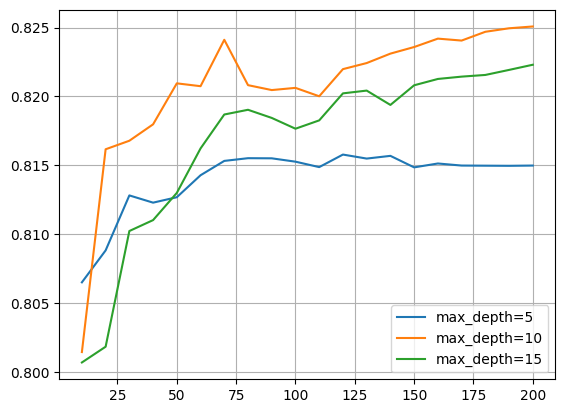

In [73]:
lines = []
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

In [74]:
#for this dataset max_depth = 10 is the best one

In [75]:
max_depth = 10 #best one

scores = []
for s in [1,3,5,10,50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=1, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [76]:
columns=["min_sample_leaf", "n_estimators","auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_sample_leaf,n_estimators,auc
0,1,10,0.801432
1,1,20,0.816164
2,1,30,0.816784
3,1,40,0.817977
4,1,50,0.820953


In [77]:
colors = ['black', 'blue', 'orange', 'red', 'gray']
min_sample_leaf_values = [1,3,5,10,50]

list(zip(min_sample_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'gray')]

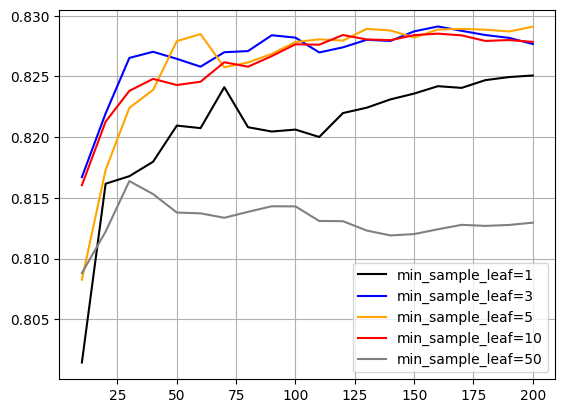

In [78]:
lines = []
for s, col in zip(min_sample_leaf_values, colors):
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    line, = plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_sample_leaf={s}", color=col)
    lines.append(line)
plt.legend(handles=lines)
plt.grid()

In [79]:
#let's go with our min-sample-leaf = 3 as our best value

In [80]:
min_samples_leaf=3

In [81]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1, min_samples_leaf=3, n_jobs=-1)
rf.fit(X_train, y_train)
#we will use this this model as it is best one

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

Other useful parameters:
* max_features
* bootstrap

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## 6.7 Gradient boosting and XGBoost

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output
  

In [82]:
!pip install xgboost

Looking in indexes: http://nexus-vm-npm.svc.devops-prod.us-east.bdf-cloud.iqvia.net:8081/nexus/repository/pypi-all/simple


In [83]:
import xgboost as xgb

In [84]:
features = list(dv.get_feature_names_out())
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [85]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [86]:
xgb_params = {
    'eta':0.3,
     'max_depth': 6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'seed':1,
    'verbosity':1,
}
    

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [87]:
y_pred = model.predict(dval)

In [88]:
roc_auc_score(y_val, y_pred) # quite good given the default parameters

np.float64(0.8139201877934272)

Lets include evaluation (watchlist) to monitor what is going on at each step

In [89]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [90]:
%%capture output

xgb_params = {
    'eta':0.3,
     'max_depth': 6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'seed':1,
    'verbosity':1,
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)

In [91]:
from typing import List

def parse_xgb_output(output:str)->pd.DataFrame:
    results = []

    for line in output.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

        # tree.append(it)
    return pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])
    #     auc_train.apend(train)
    #     auc_val.append(val)
    # return tree,auc_train, auc_val
    

In [92]:
s= output.stdout
df_score = parse_xgb_output(s)
    

In [93]:
import re

def parse_output(output:str)->pd.DataFrame:
    #print(output)
    pattern = r"\[(\d+)\].+train-auc:([0-9.]+)\tval-auc:([0-9.]+)"
    results = []
    for line in output.strip().split('\n'):
        
        matches = re.findall(pattern, line)
        it, train, val = matches.pop()
        results.append((int(it), float(train), float(val)))
    return pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])

In [94]:
df_score = parse_output(s)
#df_score

In [95]:
#output.show()

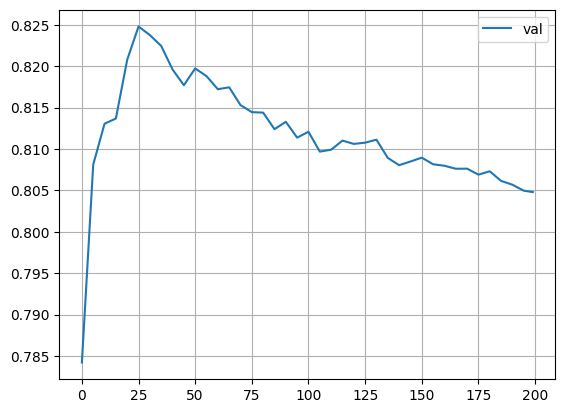

In [96]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.grid()

## 6.8 XGBoost parameter tuning

Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [98]:
scores={}

In [113]:
%%capture output

xgb_params = {
    'eta':0.01,
     'max_depth': 6,
    'min_child_weight':1,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)


ETA - is the percentage of errors from a previous model to be used for correction of the next model

In [114]:
key = f"eta={xgb_params['eta']}"
scores[key]= parse_output(output.stdout)

In [115]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86254,0.78421
1,5,0.92664,0.80812
2,10,0.94905,0.81306
3,15,0.96284,0.81369
4,20,0.97205,0.82079
5,25,0.97891,0.82481
6,30,0.98576,0.82377
7,35,0.98807,0.82246
8,40,0.99070,0.81962
9,45,0.99251,0.81771


In [116]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

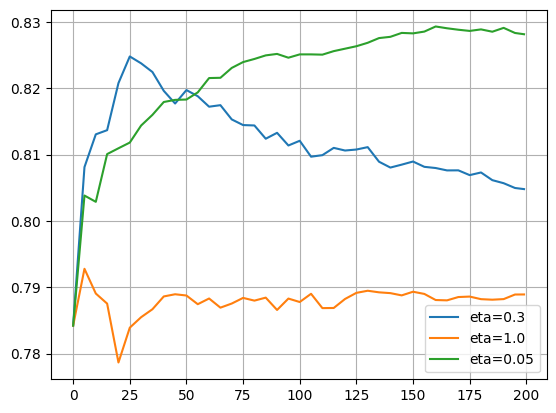

In [121]:
etas = ['eta=0.3', 'eta=1.0', 'eta=0.05']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.grid()

![random forest](images/tuning_order.jpg "a title")

In [131]:
scores={}

In [141]:
%%capture output

xgb_params = {
    'eta':0.1,
     'max_depth': 6,
    'min_child_weight':1,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)


In [142]:
key = f"'max_depth={xgb_params['max_depth']}"
scores[key]= parse_output(output.stdout)
key

"'max_depth=6"

In [143]:
scores.keys()

dict_keys(["'max_depth=3", "'max_depth=4", "'max_depth=10", "'max_depth=6"])

In [145]:
del scores["'max_depth=10"]

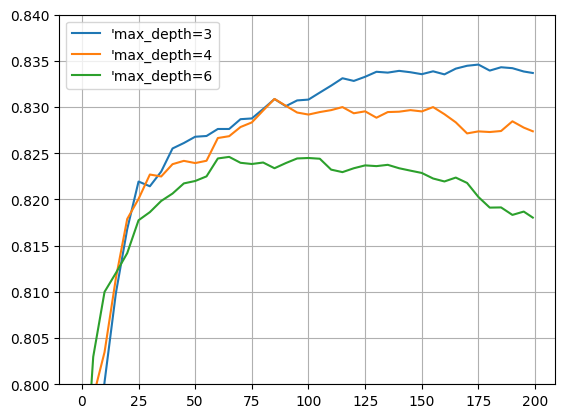

In [147]:
for max_depth, df_score in scores.items():
    #df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()
plt.grid()

Max depth of 3 is the best for this dataset

### Now we tune __min_child_weight__

In [150]:
scores={}

In [157]:
%%capture output

xgb_params = {
    'eta':0.1,
     'max_depth': 3,
    'min_child_weight':30,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=200, verbose_eval=5)


In [158]:
key = f"'min_child_weight={xgb_params['min_child_weight']}"
scores[key]= parse_output(output.stdout)
key


"'min_child_weight=30"

In [159]:
scores.keys()

dict_keys(["'min_child_weight=1", "'min_child_weight=10", "'min_child_weight=30"])

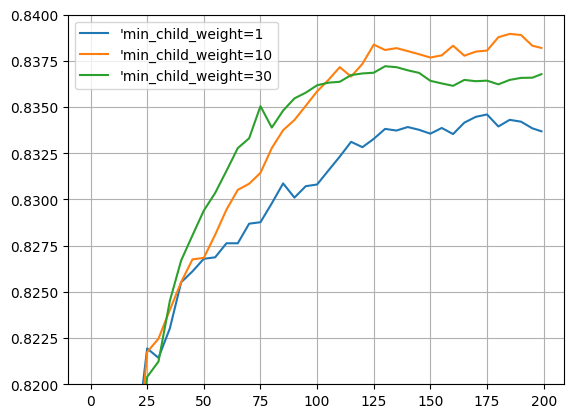

In [163]:
for min_child_weight, df_score in scores.items():
    #df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.84)
plt.legend()
plt.grid()

final model
plotting is not always required: pen and paper may suffice

In [165]:
xgb_params = {
    'eta':0.1,
     'max_depth': 3,
    'min_child_weight':1,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## 6.9 Selecting the final model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model
  

In [166]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [170]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7836103286384977)

In [168]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1, min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [171]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8276760563380282)

In [169]:
xgb_params = {
    'eta':0.1,
     'max_depth': 3,
    'min_child_weight':1,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [174]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8347558685446009)

XGBoost is the best model!

Now let's train the model on the entire dataset

In [175]:
df_full_train = df_full_train.reset_index(drop=True)

In [179]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [180]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [181]:
del df_full_train['status']

In [188]:
dict_full_train = df_full_train.to_dict(orient='records')


In [185]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dict_full_train)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [197]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [198]:
xgb_params = {
    'eta':0.1,
     'max_depth': 3,
    'min_child_weight':1,
    
    'seed':1,
    'verbosity':1,
    
    'objective':'binary:logistic',
    "eval_metric": 'auc'
}
    

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [199]:
y_pred = model.predict(dtest)

In [201]:
y_pred[:10]

array([0.29601693, 0.231007  , 0.07417598, 0.27287328, 0.35843658,
       0.24473044, 0.00899626, 0.02323965, 0.24221162, 0.23622705],
      dtype=float32)

In [202]:
roc_auc_score(y_test, y_pred)

np.float64(0.8289367577342261)

## 6.10 Summary

* Decistion trees learn if-then-else rules from data
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by lmiting the max depth and the size of the group.
* Random forest is a good way of combining multiple decision trees. It should have a divierse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementatoin of gradient boosting